# **Projet apprentissage supervisé**



```
# This is formatted as code
```

Réalisé par : Ahmed SAADI et MELLAL Hodaifa

## **Installtion de google drive**

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## **Importation des données**

In [ ]:
#Importation des données relationnelles 
downloaded = drive.CreateFile({'id':"1zJw01PtgyD7INL4sgYqD6P7Y5WkaVTaQ"})   # The id of the file ratings file
downloaded.GetContentFile('pubmed.mat') 

downloaded = drive.CreateFile({'id':"1I8IT7yLaMRL0fiLicpMcG7pp12IGUJQ8"})   # The id of the file ratings file
downloaded.GetContentFile('cora.mat') 

downloaded = drive.CreateFile({'id':"1Nj-y2bht--E_Q7qoJPkFeK-lo7KzkIgg"})   # The id of the file ratings file
downloaded.GetContentFile('citeseer.mat') 

#Importation des données bancaires
downloaded = drive.CreateFile({'id':"1-AJ-fmDmZ2p-9Cctr1YjrnnjMmb3Ybes"})   # The id of the file ratings file
downloaded.GetContentFile('VisaPremier.txt') 

downloaded = drive.CreateFile({'id':"1RJ_y4Df4v-r4tUjYiq4sVfdwWwE1-fRK"})   # The id of the file ratings file
downloaded.GetContentFile('creditcard.csv') 

## **Importation de bibliothèque**

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import collections
from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

## **I- Détection de fraude**

### **1. Analyse exploratoire**

In [ ]:
data = pd.read_csv('creditcard.csv')
df = data.copy() # To keep the data as backup
df.head()


NameError: ignored

In [ ]:
df.shape

NameError: ignored

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

**Visualiser la fréquence des fraudes**

In [ ]:
df.Class.value_counts()


In [ ]:
sns.countplot(x=df.Class, hue=df.Class)

**Visualiser la distribution de Amount**

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [ ]:
array = df.values
X = array[:,0:29].astype(float)
Y = array[:,30]

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, Y = pipeline.fit_resample(X, Y)

counter = collections.Counter(Y)
counter

In [ ]:
sns.countplot(x=Y, hue=Y)

In [ ]:
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### **2. Logistic Regression**

In [ ]:
lr_model = LogisticRegression()

# Training the algorithm
lr_model.fit(X_train, Y_train)

In [ ]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_validation)

Avant d'aller plus loin dans les métriques, décidons d'abord que l'erreur de type I ou de type II est plus importante à considérer.

Erreur de type I ou faux positifs: les faux positifs sont ceux qui ne sont en fait pas de la fraude, mais la prédiction dit qu'ils sont de la fraude.
Erreur de type II ou faux négatifs: les faux négatifs sont ceux qui sont en fait de la fraude, mais le système a dit qu'ils ne le sont pas.

Eh bien, nous pouvons dire que l'erreur de type II est plus importante parce que nous ne voulons pas que le système ait une carte de crédit frauduleuse, car cela peut être plus dangereux.

Donc, pour l'erreur de type II, nous pouvons dire que le recall est la métrique importante.

In [ ]:
# Importing the required metrics
tn, fp, fn, tp = confusion_matrix(Y_validation, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
lr_accuracy = accuracy_score(Y_validation, lr_pred_test)
lr_accuracy

In [ ]:
lr_precision = precision_score(Y_validation, lr_pred_test)
lr_precision

In [ ]:
lr_recall = recall_score(Y_validation, lr_pred_test)
lr_recall

Recall est assez elevé dans le cas de régression logistique. 

Cependant, vérifions Recall de l'ensemble de données d'entraînement (train datset) pour avoir une idée sur tout surajustement (overfitting) que nous pourrions avoir.

In [ ]:
lr_recall_train = recall_score(Y_train, lr_pred_train)
lr_recall_train

nous pouvons voir que le delta est très petit ( lr_recall_train  -  lr_recall ). Donc, on peut dire que le modèle n'est pas surajusté

In [ ]:
lr_pred_test_prob = lr_model.predict_proba(X_validation)[:, 1]

In [ ]:
# Now, to draw the ROC Curve, we need to have True Positive Rate and False Positive Rate.
fpr, tpr, threshold = roc_curve(Y_validation, lr_pred_test_prob)

# Also, let's get the auc score.

lr_auc = roc_auc_score(Y_validation, lr_pred_test_prob)
lr_auc

In [ ]:
#Now, let's define a function to plot the roc curve.
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [ ]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

### **3. Evaluation des différents algorithmes**

In [ ]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('RFC',RandomForestClassifier()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())]))) 
pipelines.append(('ScaledABC',Pipeline([('Scaler', StandardScaler()),('GBC', AdaBoostClassifier())])))    
pipelines.append(('ScaledETC',Pipeline([('Scaler', StandardScaler()),('ETC',ExtraTreesClassifier() )])))    
pipelines.append(('ScaledRFC',Pipeline([('Scaler', StandardScaler()),('RFC',  RandomForestClassifier())])))   

results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


## **II- Carte Visa**

### **1. Analyse Exploratoire**

In [ ]:
dataset = pd.read_csv('VisaPremier.txt' , delimiter = "\t")
dataset.head()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,0,0,115,701939,4,119216,0,119216,2,35938,114,11,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,0,4,19579,8920,0,0,0,0,1,132468,4079,11,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,0,0,40,3402,0,0,0,0,1,1336,40,14,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,0,0,17,76321,0,0,0,0,1,12221,17,11,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,0,0,374,473350,0,209062,37859,171203,1,21187,208,11,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,11,3,1,494773,21423,Coui,0,1,15


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matricul  1073 non-null   int64 
 1   departem  1073 non-null   object
 2   ptvente   1073 non-null   int64 
 3   sexe      1073 non-null   object
 4   age       1073 non-null   int64 
 5   sitfamil  1073 non-null   object
 6   anciente  1073 non-null   int64 
 7   csp       1073 non-null   object
 8   codeqlt   1073 non-null   object
 9   nbimpaye  1073 non-null   int64 
 10  mtrejet   1073 non-null   int64 
 11  nbopguic  1073 non-null   int64 
 12  moycred3  1073 non-null   int64 
 13  aveparmo  1073 non-null   int64 
 14  endette   1073 non-null   int64 
 15  engagemt  1073 non-null   int64 
 16  engagemc  1073 non-null   int64 
 17  engagemm  1073 non-null   int64 
 18  nbcptvue  1073 non-null   int64 
 19  moysold3  1073 non-null   int64 
 20  moycredi  1073 non-null   int64 
 21  agemvt    1073

#### **Nettoyage des données**

 - suppression des variables dupliquées cartevp & sexe.
 - suppression des lignes contenant des champs non renseignés.
 - codage des variables qualitatives sitfamil, csp et codeqlt.

In [ ]:
# Nettoyage des données  

#sitfamil :
ind = np.where(dataset['sitfamil'] == "F.")
for i in ind:
    inde= list(i)

dataset['sitfamil'] = [1 if a=="Fmar" else 2 if a=="Fcel" else 3 if a=="Fdiv" else 4 if a=="Fuli" else 5 if a=="Fsep" else 6 if a=="Fveu" else 'F.' for a in dataset.sitfamil]

#Departem :
ind = np.where(dataset['departem'] == ".")
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)

#csp
dataset['csp'] = [1 if a=="Pcad" else 2 if a=="Pemp" else 3 if a=="Psan" else 4 if a=="Pouv" else 5 if a=="Part" else 6 if a=="Pret" else 7 if a=="Pinc" else 8 for a in dataset.csp]

#codeqlt
ind = np.where(dataset['codeqlt'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)

dataset['codeqlt'] = [1 if a=="A" else 2 if a=="B" else 3 if a=="C" else 4 if a=="D" else 5 if a=="E" else 6  for a in dataset.codeqlt]

#agemvt
ind = np.where(dataset['agemvt'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)
        
#nbpaiecb      
ind = np.where(dataset['nbpaiecb'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)
        

#Suppression des ROWs 
inde.sort()
for i in inde:
    dataset = dataset.drop(i,axis=0)

#Suppression de la colonne dupliquée cartevp & sexe
dataset = dataset.drop(['cartevp'],axis=1,errors='ignore')
dataset = dataset.drop(['sexe'],axis=1,errors='ignore')


#### **Sauvegarde du data dans un nouveau fichier .csv**

In [ ]:
dataset.to_csv('CleanDataSet.txt',sep='\t',index = False)
url = 'CleanDataSet.txt'
dataset = read_csv(url,sep='\t')
#Verification
dataset.head()

,matricul,departem,ptvente,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
0,148009,31,1,51,1,238,1,1,0,0,0,115,701939,4,119216,0,119216,2,35938,114,11,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,14,2,0,1303700,556967,0,1,1
1,442153,82,6,52,1,270,1,1,0,0,4,19579,8920,0,0,0,0,1,132468,4079,11,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,5,2,0,19856243,133896,0,1,0
2,552427,97,1,58,1,139,1,3,0,0,0,40,3402,0,0,0,0,1,1336,40,14,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,0,1,0,122745,0,0,1,0
3,556005,40,1,27,2,99,3,2,0,0,0,17,76321,0,0,0,0,1,12221,17,11,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,14,2,0,83224,0,0,1,0
4,556686,65,1,49,5,89,2,1,0,0,0,374,473350,0,209062,37859,171203,1,21187,208,11,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,11,3,1,494773,21423,0,1,15


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   matricul  722 non-null    int64
 1   departem  722 non-null    int64
 2   ptvente   722 non-null    int64
 3   age       722 non-null    int64
 4   sitfamil  722 non-null    int64
 5   anciente  722 non-null    int64
 6   csp       722 non-null    int64
 7   codeqlt   722 non-null    int64
 8   nbimpaye  722 non-null    int64
 9   mtrejet   722 non-null    int64
 10  nbopguic  722 non-null    int64
 11  moycred3  722 non-null    int64
 12  aveparmo  722 non-null    int64
 13  endette   722 non-null    int64
 14  engagemt  722 non-null    int64
 15  engagemc  722 non-null    int64
 16  engagemm  722 non-null    int64
 17  nbcptvue  722 non-null    int64
 18  moysold3  722 non-null    int64
 19  moycredi  722 non-null    int64
 20  agemvt    722 non-null    int64
 21  nbop      722 non-null    int64
 22  mt

In [ ]:
### Prepare Data
from sklearn.linear_model import LinearRegression
import numpy as np
# Split-out validation dataset
array = dataset.values
Y = array[:,45]
dataset1 = dataset.drop(['cartevpr'],axis=1,errors='ignore')
array = dataset1.values

print("------------------------ dataset nettoyé ------------------------")
dataset.info()
print("-----------------------------------------------------------------")
X = array[:,:].astype(float)
reg = LinearRegression().fit(X,Y)
reg.score(X,Y)
print("#------------------  les Coefs de regression  ----------------------")
print(reg.coef_)
#---------    les 10 premieres variables  ---------------
li = []
for i in reg.coef_:
    li.append(abs(i))
index = []
for i in range(0,46):
    index.append(i)
resultat = [[note, nom] for note, nom in zip(li, index)]
li.sort()
li =li[0:10]
#--------  les variables à supprimer  -------------------
ind=[]
for i in li:
    for j in resultat:
        if i == j[0]:
            ind.append(j[1])
sup = []
for i in range(0,45):
    if i not in ind:
        sup.append(i)
print("#------------------  les variables à supprimer  ----------------------")
print(sup)
print("#------------------  les variables à garder     ----------------------")
print(ind)
X_new = np.delete(X,sup,1)
X_new.shape[1]
X =X_new
#-------------------------------------------------------------------------------------------
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



------------------------ dataset nettoyé ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   matricul  722 non-null    int64
 1   departem  722 non-null    int64
 2   ptvente   722 non-null    int64
 3   age       722 non-null    int64
 4   sitfamil  722 non-null    int64
 5   anciente  722 non-null    int64
 6   csp       722 non-null    int64
 7   codeqlt   722 non-null    int64
 8   nbimpaye  722 non-null    int64
 9   mtrejet   722 non-null    int64
 10  nbopguic  722 non-null    int64
 11  moycred3  722 non-null    int64
 12  aveparmo  722 non-null    int64
 13  endette   722 non-null    int64
 14  engagemt  722 non-null    int64
 15  engagemc  722 non-null    int64
 16  engagemm  722 non-null    int64
 17  nbcptvue  722 non-null    int64
 18  moysold3  722 non-null    int64
 19  moycredi  722 non-null    int64
 20  agemvt    

In [ ]:
# Evaluate Algorithms
from sklearn.metrics import make_scorer
from sklearn.metrics import *
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('RFC',RandomForestClassifier()))
results = []
names = []
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
LR: 0.467907 (0.048388)
LDA: 0.436661 (0.047266)
KNN: 0.445221 (0.060066)
CART: 0.273563 (0.073144)
NB: 0.039958 (0.020807)
SVM: 0.479915 (0.053276)
GBC: 0.389897 (0.057162)
ABC: 0.481639 (0.053618)
ETC: 0.455717 (0.053897)
RFC: 0.476437 (0.051605)
----------------------------------------
this is  make_scorer(f1_score, average=weighted)  scoring
----------------------------------------
LR: 0.334332 (0.058589)
LDA: 0.308648 (0.055301)
KNN: 0.304594 (0.058078)
CART: 0.281821 (0.047559)
NB: 0.057382 (0.037199)
SVM: 0.313003 (0.058159)
GBC: 0.329434 (0.060275)
ABC: 0.340035 (0.062460)
ETC: 0.323538 (0.056999)
RFC: 0.348349 (0.057834)


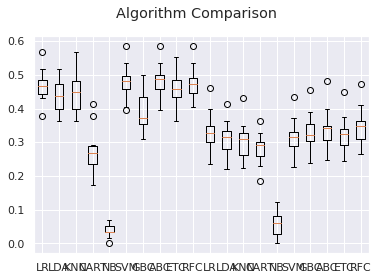

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Interprétation :
 - après avoir nettoyer nos données et réduire le nombre de variables, on a pu construire des modèles qui ont données des scores considérables (0.6 en moyenne).
 - en jettant un oeil sur nos données on a constaté que les données ne sont pas sur la meme échelle(par exemple age et ancienté) ce qui justifie la faible performance de certains modèles

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())]))) 
pipelines.append(('ScaledABC',Pipeline([('Scaler', StandardScaler()),('GBC', AdaBoostClassifier())])))    
pipelines.append(('ScaledETC',Pipeline([('Scaler', StandardScaler()),('ETC',ExtraTreesClassifier() )])))    
pipelines.append(('ScaledRFC',Pipeline([('Scaler', StandardScaler()),('RFC',  RandomForestClassifier())])))   

results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



ScaledLR: 0.469601 (0.048666)
ScaledLDA: 0.434906 (0.052716)
ScaledKNN: 0.452269 (0.048077)
ScaledCART: 0.263309 (0.049142)
ScaledNB: 0.015578 (0.012165)
ScaledGBC: 0.384483 (0.052841)
ScaledABC: 0.481730 (0.053149)
ScaledETC: 0.466152 (0.053161)
ScaledRFC: 0.471325 (0.050632)


## **III- Cora**

### **1. Analyse Exploratoire**

In [ ]:
import scipy.io
mat = scipy.io.loadmat('cora.mat')
X = mat['fea']
Y = mat['gnd']


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
Y

array([[4],
       [5],
       [5],
       ...,
       [4],
       [4],
       [4]], dtype=uint8)

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np
# Split-out validation dataset

#-------------------------------------------------------------------------------------------
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [ ]:
# Evaluate Algorithms
from sklearn.metrics import make_scorer
from sklearn.metrics import *
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('RFC',RandomForestClassifier()))
results = []
names = []
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
LR: 0.762238 (0.026590)
LDA: 0.530026 (0.020327)
KNN: 0.445055 (0.032130)
CART: 0.638057 (0.033759)
NB: 0.505961 (0.028948)
SVM: 0.733137 (0.022788)
GBC: 0.740553 (0.019632)
ABC: 0.528151 (0.041722)
ETC: 0.759012 (0.025591)
RFC: 0.756245 (0.019511)
----------------------------------------
this is  make_scorer(f1_score, average=weighted)  scoring
----------------------------------------
LR: 0.759634 (0.027166)
LDA: 0.531570 (0.019839)
KNN: 0.421155 (0.032405)
CART: 0.647444 (0.033316)
NB: 0.504398 (0.029040)
SVM: 0.730248 (0.023782)
GBC: 0.737548 (0.020320)
ABC: 0.533430 (0.040208)
ETC: 0.755485 (0.025437)
RFC: 0.748437 (0.016885)


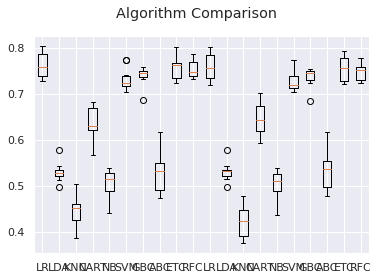

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## **IV- CitSeer**

### **1. Analyse Exploratoire**

In [ ]:
import scipy.io
mat = scipy.io.loadmat('citeseer.mat')
X = mat['fea']
Y = mat['gnd']


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
Y

array([[4],
       [2],
       [6],
       ...,
       [4],
       [2],
       [6]], dtype=uint8)

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np
# Split-out validation dataset

#-------------------------------------------------------------------------------------------
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [ ]:
# Evaluate Algorithms
from sklearn.metrics import make_scorer
from sklearn.metrics import *
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('RFC',RandomForestClassifier()))
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.706123 (0.021803)
LDA: 0.381048 (0.023641)
KNN: 0.086434 (0.015132)
CART: 0.604665 (0.036577)
NB: 0.602418 (0.032073)
SVM: 0.723781 (0.027080)
GBC: 0.702358 (0.028359)
ABC: 0.618176 (0.037035)
ETC: 0.727920 (0.024915)
RFC: 0.719650 (0.024418)


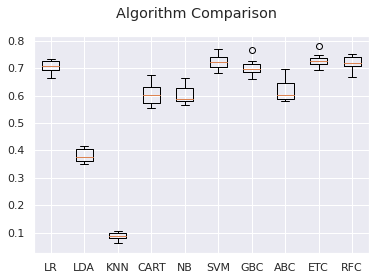

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## **V- Pubmed**

### **1. Analyse Exploratoire**

In [ ]:
import scipy.io
mat = scipy.io.loadmat('pubmed.mat')
X = mat['fea']
Y = mat['gnd']


In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10463634, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01942665, 0.0079607 , ..., 0.        , 0.        ,
        0.        ],
       [0.10782092, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02658384, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
Y

array([[2],
       [2],
       [1],
       ...,
       [3],
       [1],
       [3]], dtype=uint8)

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np
# Split-out validation dataset

#-------------------------------------------------------------------------------------------
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [ ]:
# Evaluate Algorithms
from sklearn.metrics import make_scorer
from sklearn.metrics import *
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('RFC',RandomForestClassifier()))
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.859950 (0.008353)
LDA: 0.865023 (0.010900)
KNN: 0.770623 (0.013456)
CART: 0.824256 (0.009191)
NB: 0.753313 (0.016388)
SVM: 0.880049 (0.011036)
GBC: 0.888671 (0.006646)
ABC: 0.830279 (0.010286)
ETC: 0.881444 (0.009210)
RFC: 0.888481 (0.009305)


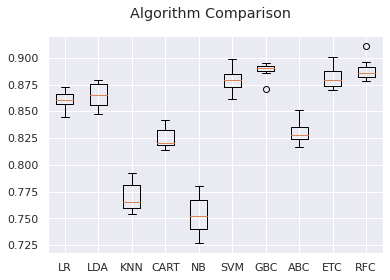

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()